In [1]:
# import sys
# !{sys.executable} -m pip install -U pip --user
# !{sys.executable} -m pip install -U codeium-jupyter --user

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Using cached codeium_jupyter-2.1.0-py3-none-any.whl.metadata (6.0 kB)
Using cached codeium_jupyter-2.1.0-py3-none-any.whl (121 kB)


Import `load_dataset` function and load one of the datasets: `emotion`.

Import `load_dataset` function and load one of the datasets: `emotion`.

In [1]:
from datasets import load_dataset

emotions = load_dataset('emotion')
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

Store train dataset into `train_ds`. Examine `column_names`, `features`

In [2]:
train_ds = emotions['train']

print(train_ds)
print(train_ds.features)
print(train_ds.column_names)

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}
['text', 'label']


Conver to DataFrame

In [3]:
import pandas as pd

df = pd.DataFrame(train_ds)
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [4]:
# emotions.set_format(type='pandas')
# df = emotions['train'][:]
# df

Get label names with `int2str`

In [5]:
label_int2str = lambda x: emotions['train'].features['label'].int2str(x)

In [6]:
df['label_name'] = df['label'].apply(label_int2str)

In [7]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


Class distribution should be uniform. Datasets with imbalanced distribution needs to be processed.

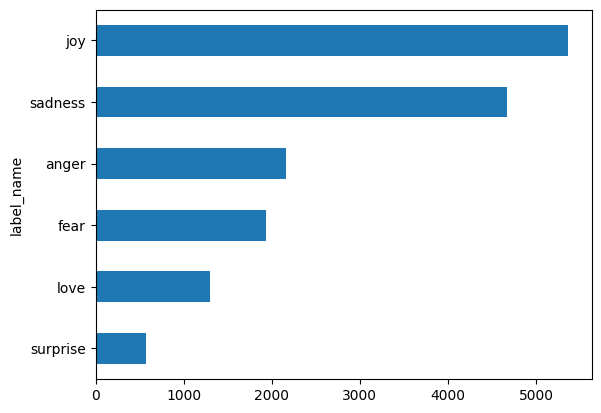

In [8]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.show()

Examine tweet lengths. Transformers have **context length**. Make sure the data fits within that context.

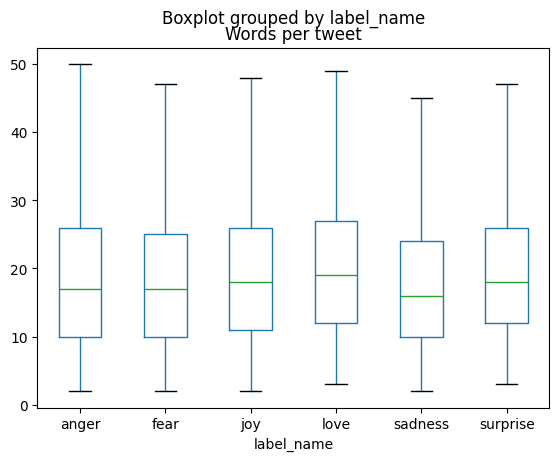

In [9]:
df['Words per tweet'] = df['text'].str.split().apply(len)
df.boxplot("Words per tweet", by="label_name", grid=False, showfliers=False)
plt.show()

In [10]:
text_lengths = df['text'].str.len()

mean_length = text_lengths.mean()
max_length = text_lengths.max()
min_length = text_lengths.min()
std_length = text_lengths.std()
median_length = text_lengths.median()

print(f"Max length: {max_length}")
print(f"Min length: {min_length}")
print(f"Mean length: {mean_length:.2f}")
print(f"Median length: {median_length}")
print(f"Standard deviation: {std_length:.2f}")

Max length: 300
Min length: 7
Mean length: 96.85
Median length: 86.0
Standard deviation: 55.90


In [11]:
text = 'Tokenizing text is a core task of NLP.'
token2idx = {token: idx for idx, token in enumerate(sorted(set(list(text))))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [12]:
input_ids = [token2idx[token] for token in text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [13]:
import torch
from torch.nn.functional import one_hot

input_tensor = torch.tensor(input_ids)
input_tensor = one_hot(input_tensor, num_classes=len(token2idx))
print(input_tensor.shape)

torch.Size([38, 20])


Word tokenizer. 

In [14]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


Subword tokenization.

In [15]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


c:\Users\lived\miniconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [16]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [17]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [18]:
tokenizer.vocab_size

30522

In [19]:
tokenizer.model_max_length

512

Tokenize the dataset.

In [20]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

tokenized_emotions = emotions.map(tokenize, batched=True)
tokenized_emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

# Train classifier using hidden states.
Import AutoModel.
Define device.
Instantiate model from pretrained.
Then load to device.

In [21]:
from transformers import AutoModel

model_ckpt = 'distilbert-base-uncased'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = AutoModel.from_pretrained(model_ckpt).to(device)

Input must be tokenized and stored in Pytorch tensors before training.

In [22]:
test_input = 'Tokenizing text is boring.'
test_input = tokenizer(test_input, return_tensors='pt')
print(test_input['input_ids'])

tensor([[  101, 19204,  6026,  3793,  2003, 11771,  1012,   102]])


Move tensors to the same device as the model.

In [23]:
test_input = {key: val.to(device) for key, val in test_input.items()}
with torch.no_grad():
    output = model(**test_input)
print(output.last_hidden_state.shape)

torch.Size([1, 8, 768])


In BERT, the *first tokens* of the last hidden state is \[CLS\] which is used for classification. 

In [24]:
cls_tokens = output.last_hidden_state[:, 0]
print(cls_tokens.shape)

torch.Size([1, 768])


Now create hidden_state column for the dataset.

In [25]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [26]:
tokenized_emotions.set_format(type='torch')
def extract_hidden_states(batch):
    # Place the input tensors on the same device as the model
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    # Extract the hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return the hidden states as a list
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

# Apply the function to the tokenized_emotions dataset
tokenized_emotions = tokenized_emotions.map(extract_hidden_states, batched=True)

In [27]:
tokenized_emotions['train']['hidden_state'].shape

torch.Size([16000, 768])

In [28]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
X_train = np.array(tokenized_emotions['train']['hidden_state'])
X_valid = np.array(tokenized_emotions['validation']['hidden_state'])
y_train = np.array(tokenized_emotions['train']['label'])
y_valid = np.array(tokenized_emotions['validation']['label'])

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)



(16000, 768) (16000,)
(2000, 768) (2000,)


Train with simple logistic regression.

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg.score(X_valid, y_valid)

0.633

In [30]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_valid, y_valid)

0.352

Logistic regression resulted in higher accuracy than baseline performance. But that is not good enough.

# Fine-tune

In [31]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=6).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Define `compute_metrics()` to monitor training performance.

In [32]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
    }

In [33]:
# from huggingface_hub import notebook_login
# notebook_login()

Define training parameters.

In [37]:
from transformers import Trainer, TrainingArguments

batch_size=64
logging_steps = len(tokenized_emotions['train']) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                 num_train_epochs=2,
                                 learning_rate=2e-5,
                                 per_device_train_batch_size=batch_size,
                                 per_device_eval_batch_size=batch_size,
                                 weight_decay=0.01,
                                 evaluation_strategy="epoch",
                                 disable_tqdm=False,
                                 logging_steps=logging_steps,
                                 push_to_hub=False,
                                 log_level="error")

In [39]:
trainer = Trainer(model=model, args=training_args, compute_metrics=compute_metrics, train_dataset=tokenized_emotions['train'], eval_dataset=tokenized_emotions['validation'], tokenizer=tokenizer)
training_result  = trainer.train()

  0%|          | 0/500 [00:00<?, ?it/s]

{'loss': 0.1731, 'grad_norm': 2.551981210708618, 'learning_rate': 1e-05, 'epoch': 1.0}


  0%|          | 0/32 [00:00<?, ?it/s]

{'eval_loss': 0.17021411657333374, 'eval_accuracy': 0.9305, 'eval_f1': 0.9307220523844859, 'eval_runtime': 1.0874, 'eval_samples_per_second': 1839.233, 'eval_steps_per_second': 29.428, 'epoch': 1.0}
{'loss': 0.1096, 'grad_norm': 6.38357400894165, 'learning_rate': 0.0, 'epoch': 2.0}


  0%|          | 0/32 [00:00<?, ?it/s]

{'eval_loss': 0.1511256992816925, 'eval_accuracy': 0.9335, 'eval_f1': 0.9335726404007187, 'eval_runtime': 1.3709, 'eval_samples_per_second': 1458.858, 'eval_steps_per_second': 23.342, 'epoch': 2.0}
{'train_runtime': 69.5572, 'train_samples_per_second': 460.053, 'train_steps_per_second': 7.188, 'train_loss': 0.1413594970703125, 'epoch': 2.0}


In [42]:
print(training_result)

TrainOutput(global_step=500, training_loss=0.1413594970703125, metrics={'train_runtime': 69.5572, 'train_samples_per_second': 460.053, 'train_steps_per_second': 7.188, 'total_flos': 718554424246272.0, 'train_loss': 0.1413594970703125, 'epoch': 2.0})


In [44]:
pred = trainer.predict(tokenized_emotions['validation'])
pred.metrics

  0%|          | 0/32 [00:00<?, ?it/s]

{'test_loss': 0.1511256992816925,
 'test_accuracy': 0.9335,
 'test_f1': 0.9335726404007187,
 'test_runtime': 1.3148,
 'test_samples_per_second': 1521.094,
 'test_steps_per_second': 24.338}

In [47]:
trainer.push_to_hub(commit_message="Training completed!")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/hieundx/distilbert-base-uncased-finetuned-emotion/commit/49e495e1af4a51cf5c536959eedfbfc868b9182b', commit_message='Training completed!', commit_description='', oid='49e495e1af4a51cf5c536959eedfbfc868b9182b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/hieundx/distilbert-base-uncased-finetuned-emotion', endpoint='https://huggingface.co', repo_type='model', repo_id='hieundx/distilbert-base-uncased-finetuned-emotion'), pr_revision=None, pr_num=None)

In [48]:
from transformers import pipeline

model_id = 'hieundx/distilbert-base-uncased-finetuned-emotion'

classifier = pipeline('text-classification', model=model_id)

config.json:   0%|          | 0.00/924 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [52]:
custom_tweet = "I am so freaking pissed!"
preds = classifier(custom_tweet, return_all_scores=True)

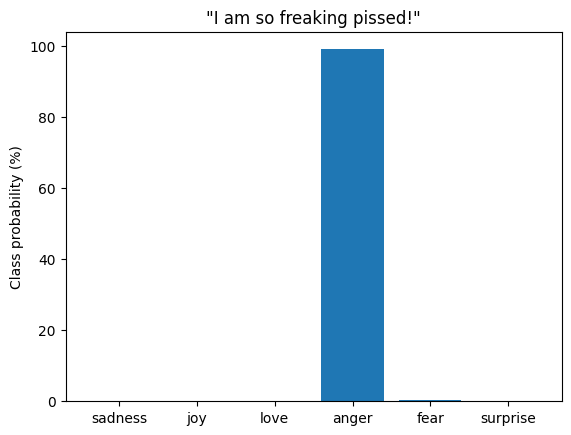

In [53]:
preds_df = pd.DataFrame(preds[0])

# plot bar chart
labels = emotions["train"].features["label"].names
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()
